In [2]:
import os 
import pandas as pd
import numpy as np
from scipy import stats

In [ ]:
# reading the file 

In [4]:
df=pd.read_excel("C:\\Users\\Chand\\Downloads\\Miz.xlsx")

In [ ]:
# Extracting Mizoram data 

In [5]:
Mizoram = df[['Age','Religion','eggsno_q','fishprawn_q','goatmeat_q','beef_q','pork_q','chicken_q','othrbirds_q']]

In [6]:
print(Mizoram.describe())

               Age     Religion     eggsno_q  fishprawn_q   goatmeat_q  \
count  1536.000000  1536.000000  1536.000000  1536.000000  1536.000000   
mean     46.694661     3.117188     0.000186     0.121713     0.006977   
std      11.810717     0.766100     0.000187     0.223880     0.069212   
min      18.000000     1.000000     0.000000     0.000000     0.000000   
25%      38.000000     3.000000     0.000055     0.000000     0.000000   
50%      47.000000     3.000000     0.000138     0.000000     0.000000   
75%      54.000000     3.000000     0.000275     0.200000     0.000000   
max      87.000000     6.000000     0.001650     3.000000     1.500000   

            beef_q       pork_q    chicken_q  othrbirds_q  
count  1536.000000  1536.000000  1536.000000  1536.000000  
mean      0.106797     0.572749     0.140367     0.056279  
std       0.214431     0.446186     0.233761     0.152804  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.250000  

In [7]:
print(Mizoram.shape)

(1536, 9)


In [8]:
Mizoram.isnull().sum()

Age            0
Religion       0
eggsno_q       0
fishprawn_q    0
goatmeat_q     0
beef_q         0
pork_q         0
chicken_q      0
othrbirds_q    0
dtype: int64

In [9]:
print(Mizoram.columns)

Index(['Age', 'Religion', 'eggsno_q', 'fishprawn_q', 'goatmeat_q', 'beef_q',
       'pork_q', 'chicken_q', 'othrbirds_q'],
      dtype='object')


In [10]:
Mizoram.dtypes

Age              int64
Religion         int64
eggsno_q       float64
fishprawn_q    float64
goatmeat_q     float64
beef_q         float64
pork_q         float64
chicken_q      float64
othrbirds_q    float64
dtype: object

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
z_scores = (Mizoram - Mizoram.mean()) /Mizoram.std()
outliers = (z_scores > 3) | (z_scores < -3)

In [13]:
print("Outliers:\n",outliers)

Outliers:
         Age  Religion  eggsno_q  fishprawn_q  goatmeat_q  beef_q  pork_q  \
0     False     False     False        False       False   False   False   
1     False     False     False        False       False   False   False   
2     False     False     False        False       False   False   False   
3     False     False     False        False       False   False   False   
4     False     False     False        False       False   False   False   
...     ...       ...       ...          ...         ...     ...     ...   
1531  False      True     False        False       False   False   False   
1532  False     False     False        False       False   False   False   
1533  False     False     False        False       False   False   False   
1534  False      True     False        False       False   False   False   
1535  False      True     False        False       False   False   False   

      chicken_q  othrbirds_q  
0         False        False  
1         Fals

In [14]:
subset = Mizoram

In [15]:
z_score = (subset - subset.mean()) / subset.std()

In [16]:
outliers = (z_score > 3) | (z_scores <-3)

In [17]:
subset_no_outliers = subset[~outliers.any(axis=1)]

In [18]:
subset_no_outliers.reset_index(drop=True, inplace=True)

In [19]:

print("Mizoram without Outliers:\n",subset_no_outliers)

Mizoram without Outliers:
       Age  Religion  eggsno_q  fishprawn_q  goatmeat_q    beef_q    pork_q  \
0      29         3  0.000138     0.000000         0.0  0.000000  0.750000   
1      54         3  0.000000     0.000000         0.0  0.000000  1.333333   
2      45         3  0.000000     0.000000         0.0  0.142857  0.571429   
3      61         3  0.000550     0.000000         0.0  0.250000  0.500000   
4      36         3  0.000000     0.000000         0.0  0.000000  1.333333   
...   ...       ...       ...          ...         ...       ...       ...   
1299   36         3  0.000183     0.000000         0.0  0.000000  0.666667   
1300   42         3  0.000110     0.000000         0.0  0.200000  0.400000   
1301   47         3  0.000138     0.166667         0.0  0.166667  0.333333   
1302   48         3  0.000132     0.000000         0.2  0.000000  0.400000   
1303   40         3  0.000069     0.000000         0.0  0.000000  0.500000   

      chicken_q  othrbirds_q  
0    

In [23]:
# Find unique values in the 'Religion' column
unique_religions = df['Religion'].unique()

# Print the unique religions
print(unique_religions)

[3 1 2 6 4]


In [24]:
# christianity 3 , Hinduism 1, Islam 2, Buddhism 6, Sikhism 4

In [25]:
religion_mapping={1:'Hinduism',2:'Islam',3:'Christianity',4:'Sikhism',6:'Buddhism'}

In [26]:
subset_no_outliers['Religion']=subset_no_outliers['Religion'].replace(religion_mapping)

C:\Users\Chand\AppData\Local\Temp\ipykernel_19724\2193113389.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_no_outliers['Religion']=subset_no_outliers['Religion'].replace(religion_mapping)


In [36]:

print(subset_no_outliers['Religion'].value_counts())

Religion
Christianity    1273
Hinduism          22
Islam              8
Sikhism            1
Name: count, dtype: int64


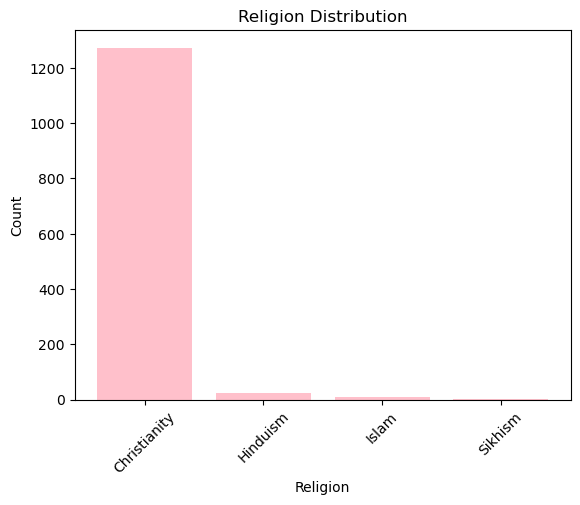

In [38]:
religion_counts = pd.Series([1273, 22, 8, 1], index=['Christianity','Hinduism','Islam','Sikhism'])
plt.bar(religion_counts.index, religion_counts.values, color='pink')  # Adjust color as desired
plt.xlabel("Religion")
plt.ylabel("Count")
plt.title("Religion Distribution")
plt.xticks(rotation=45)
plt.show()

In [39]:
print(subset_no_outliers['Religion'].value_counts())

Religion
Christianity    1273
Hinduism          22
Islam              8
Sikhism            1
Name: count, dtype: int64


In [40]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize

In [41]:
subset_no_outliers['target'] = np.where(subset_no_outliers['eggsno_q'] > 0,1,0)
x = subset_no_outliers.drop(['eggsno_q'], axis = 1)
x = sm.add_constant(x)
y = subset_no_outliers['target']

C:\Users\Chand\AppData\Local\Temp\ipykernel_19724\280301051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_no_outliers['target'] = np.where(subset_no_outliers['eggsno_q'] > 0,1,0)


In [44]:
columns = ['eggsno_q','fishprawn_q','goatmeat_q','beef_q','pork_q','chicken_q','othrbirds_q']

In [46]:
data = subset_no_outliers[columns].copy()

In [47]:
data.dtypes

eggsno_q       float64
fishprawn_q    float64
goatmeat_q     float64
beef_q         float64
pork_q         float64
chicken_q      float64
othrbirds_q    float64
dtype: object

In [48]:

data['target'] = np.where(data['eggsno_q'] > 0,1,0)
x = data.drop(['eggsno_q'], axis = 1)
x = sm.add_constant(x)
y = data['target']

         Current function value: 0.000000
         Iterations: 35
                          Probit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1304
Model:                         Probit   Df Residuals:                     1296
Method:                           MLE   Df Model:                            7
Date:                Mon, 01 Jul 2024   Pseudo R-squ.:                   1.000
Time:                        14:16:10   Log-Likelihood:            -6.8055e-05
converged:                      False   LL-Null:                       -661.03
Covariance Type:            nonrobust   LLR p-value:                2.817e-281
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.8934     62.077     -0.079      0.937    -126.563     116.776
fishprawn_q     0.4854    231.534      0.002      0.998    -45

C:\Users\Chand\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Chand\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Chand\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Chand\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\Chand\anaconda3